# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Author:** first_name_1 last_name_1, first_name_2 last_name_2, first_name_3 last_name_3  
**Due date:** 08.05.2020

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [5]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [6]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)


(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

In [30]:
import math
from scipy import stats
sets_n=["a","b","c"]
sets=[a,b,c]
for name,data in zip(sets_n,sets):
    k2, p = stats.normaltest(data, axis=0)
    print("p_value, set", name, "in x {:.3f} in y {:.3f}".format(p[0], p[1]))

p_value, set a in x 0.965 in y 0.956
p_value, set b in x 0.065 in y 0.581
p_value, set c in x 0.772 in y 0.665


All p-values are above 5% and many are way above so we can hypothesize that they all follow a normal distribution

In [31]:


fig, ax = plt.subplots(1, 1, figsize=(12, 12))
for data,name in zip(sets,sets_n):
    ax.plot(data[:,0], data[:,1], label=name)
# ax.plot(np.mean(a,axis=0)[0], np.mean(a,axis=0)[1], "k^")

cov_inv_a=np.linalg.inv(np.cov(a.T))
cov_inv_b=np.linalg.inv(np.cov(b.T))
cov_inv_c=np.linalg.inv(np.cov(c.T))
mu_a=np.mean(a, axis=0)
mu_b=np.mean(b, axis=0)
mu_c=np.mean(c, axis=0)


print("Covariance matrices")
print(np.cov(a.T))
print(np.cov(b.T))
print(np.cov(c.T))
print("Inverse of covariance matrices)
print(cov_inv_a)
print(cov_inv_b)
print(cov_inv_c)

#discriminant function g(w_i, x)
def discr(cov_inv, mu,x):
    return -0.5*np.dot(x, cov_inv.dot(x))+0.5*np.dot(x, cov_inv.dot(mu))-0.5*np.dot(mu, cov_inv.dot(mu))+0.5*np.dot(mu, cov_inv.dot(x))+np.log(1/(np.sqrt(2*math.pi)*np.sqrt(np.linalg.norm(cov_inv))))

epsilon=10e-2
curve_ab=[]
curve_ac=[]
curve_bc=[]
for ix in np.linspace(-20,20,200):
    for iy in np.linspace(-4,4,200):
        diff_ab=discr(cov_inv_a, mu_a, np.array([ix,iy]))-discr(cov_inv_b,mu_b, np.array([ix,iy]))
        if np.abs(diff_ab)< epsilon:
#             ax.plot(ix, iy, 'k+')
            curve_ab.append([ix, iy])
for ix in np.linspace(-8,0,200):
    for iy in np.linspace(-10,10,200):
        diff_ac=discr(cov_inv_a, mu_a,np.array([ix,iy]))-discr(cov_inv_c, mu_c, np.array([ix,iy]))
        diff_bc=discr(cov_inv_b, mu_b,np.array([ix,iy]))-discr(cov_inv_c, mu_c, np.array([ix,iy]))
        if np.abs(diff_ac)< epsilon:
#             ax.plot(ix, iy, 'r+')
            curve_ac.append([ix, iy])
        if np.abs(diff_bc) < epsilon:
#             ax.plot(ix, iy, 'y+')
            curve_bc.append([ix, iy])
ax.plot([c[0] for c in curve_ab],[c[1] for c in curve_ab] , 'k+', label='separation set a and b')
ax.plot([c[0] for c in curve_ac],[c[1] for c in curve_ac] , 'r+', label='separation set a and c')
ax.plot([c[0] for c in curve_bc],[c[1] for c in curve_bc] , 'y+', label='separation set b and c')
ax.legend()
plt.ylim(-7.5,7.5)
plt.xlim(-15,15)
plt.show()

SyntaxError: invalid syntax (<ipython-input-31-b4f5721a0efe>, line 16)

### Discussion
The covariance matrix of sets a and b are very similar thus the separation line between them is very close to a line. However, the third set (set c) has a significantly larger y variance than the two others so the assumption of the covariances being equal does not hold anymore and the separation curves for a-c and a-b are hyperbolas.

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

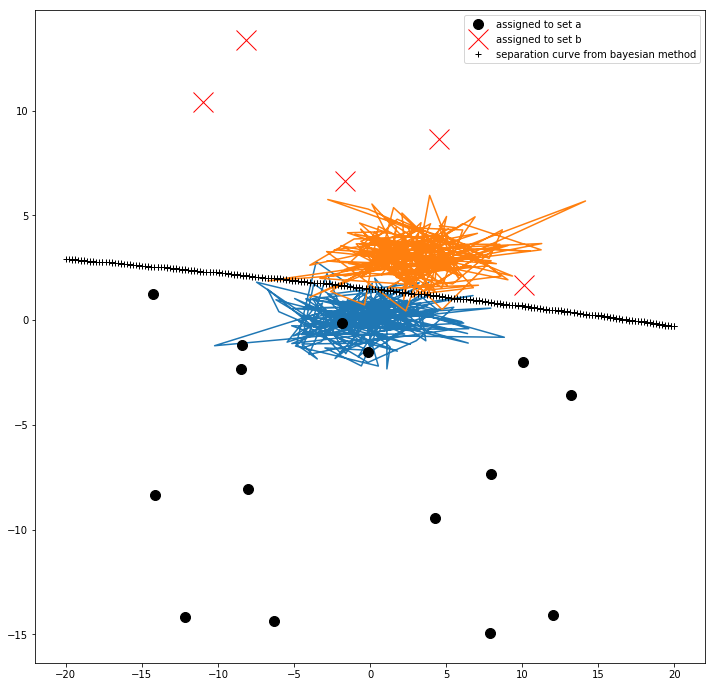

In [9]:
def mahala(cov, mu, x):
    return np.sqrt((x-mu).dot(cov.dot(x-mu)))

from random import seed
from random import random
seed(1)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for data in [a,b]:
    ax.plot(data[:,0], data[:,1])
in_a=[]
in_b=[]
for _ in range (20):
    value_x = -15 + (random() * (30))#a random number in [-15;15]
    value_y= -15 + (random() * (30))
    d_a=mahala(cov_inv_a, mu_a, np.array([value_x, value_y]))
    d_b=mahala(cov_inv_b, mu_b, np.array([value_x, value_y]))
    if d_a < d_b:
        in_a.append([value_x, value_y])
    else:
        in_b.append([value_x, value_y])
ax.plot([p[0] for p in in_a], [p[1] for p in in_a] ,'k.', markersize=20, label='assigned to set a')
ax.plot([p[0] for p in in_b], [p[1] for p in in_b] ,'rx', markersize=20, label='assigned to set b')
ax.plot([c[0] for c in curve_ab],[c[1] for c in curve_ab] , 'k+', label='separation curve from bayesian method')

plt.legend()
plt.show()
# fig, ax = plt.subplots(1, 1, figsize=(12, 12))
# for i,x in enumerate(a):
#     ax.plot(i,mahala(cov_inv_a, mu_a, x), 'k.', markersize=20)
#     ax.plot(i,mahala(cov_inv_b, mu_b, x), 'r+', markersize=20)
# #     print(mahala(cov_inv_a, mu_a, x), mahala(cov_inv_b, mu_b, x))

# plt.show()

### Discussion
The mahalanobis distance works fine for the sets a and b.

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [10]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [11]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

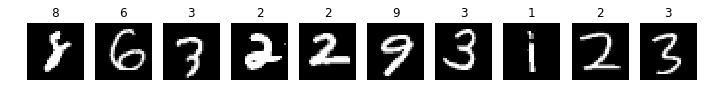

In [12]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP

In [13]:
from sklearn.neural_network import MLPClassifier

trainer=np.empty((train_images.shape[0], train_images.shape[1]*train_images.shape[2]))
for i, im in enumerate(train_images):
    trainer[i]=im.flatten()
# print(trainer[0])
print(train_labels)
print(trainer.shape)
clf = MLPClassifier(hidden_layer_sizes = (100,), solver='lbfgs', alpha=1e-5, random_state=1)
clf.fit(trainer, train_labels)

[5 0 4 ... 5 6 8]
(60000, 784)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:
clf_adam= MLPClassifier(hidden_layer_sizes = (100,), solver='adam', alpha=1e-5, random_state=1)
clf_adam.fit(trainer, train_labels)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
clf_lbfgs_alpha10e4=MLPClassifier(hidden_layer_sizes = (100,), solver='lbfgs', alpha=1e-4, random_state=1)
clf_lbfgs_alpha10e4.fit(trainer, train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

[7 2]
(10000, 28, 28)


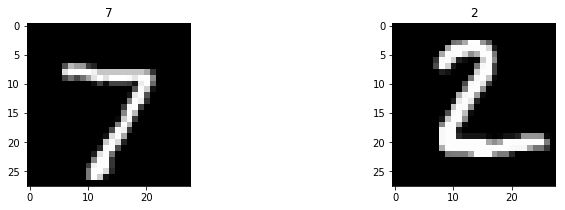

In [16]:
print(clf.predict([test_images[0].flatten(), test_images[1].flatten()]))
print(test_images.shape)
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].imshow(test_images[0],cmap='gray' )
axes[1].imshow(test_images[1],cmap='gray')
axes[0].set_title(test_labels[0])
axes[1].set_title(test_labels[1])
plt.show()

In [17]:
tester=np.empty((test_images.shape[0], test_images.shape[1]*test_images.shape[2]))
for i, im in enumerate(test_images):
    tester[i]=im.flatten()
    
# predictions=clf.predict(tester)
predictions=clf_adam.predict(tester)

[9, 15, 34, 27, 37, 29, 35, 38, 45, 39]


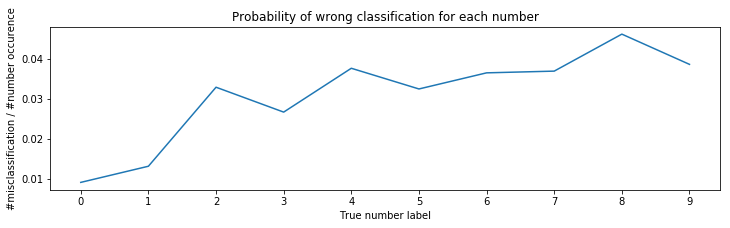

[4, 0, 3, 1, 0, 0, 2, 2, 1, 24]


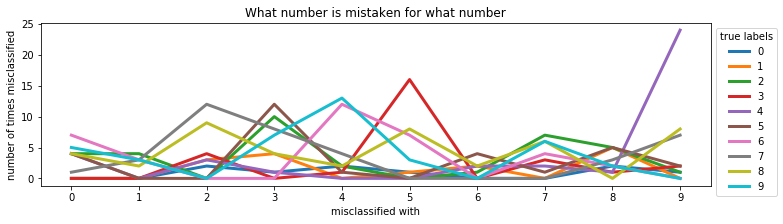

In [18]:
wrong=[0]*10
count=[0]*10
miss=[[0]*10 for _ in range(10)]
# print(miss)
for p,l in zip(predictions, test_labels):
    count[l]+=1
    if p != l:
        wrong[l]+=1
        miss[l][p]+=1
print(wrong)
# for l in miss:
#     print(l)
# print(miss)
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot([w/c for (w,c) in zip(wrong,count)])
ax.set_title('Probability of wrong classification for each number')
ax.set_xlabel('True number label')
ax.set_ylabel('#misclassification / #number occurence')
plt.xticks(ticks=range(10))
plt.show()
print(miss[4])
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
for i,l in enumerate(miss):
    ax.plot(l, label=i, linewidth=3)
ax.legend(loc='best', bbox_to_anchor=(1, 1, 0, 0), title='true labels')
ax.set_title("What number is mistaken for what number")
ax.set_xlabel('misclassified with')
ax.set_ylabel('number of times misclassified')
plt.xticks(ticks=range(10))
plt.show()


### Discussion

The first plot represents the number of times a number was misclassified divided by the number of occurences of this number to have a probability $P(x \text{ classified in i} | x \notin i)$ for an image $x$ and a class $i$. We see that the number 5 and 1 are respectively the most and least prone to misclassification. However, the probability of a number being misclassified is less than 10% for all number. This might not be enough though.

The second plot was made to see which number is misinterpreted for which number. Each plot represents a number true label, the x axis is the number it was misinterpreted for and the y axis is the number of times it occured. For example, the number 5 was mistaken 25 times for a 3 and the number 4 was mistaken 32 times for a 9. Also, interestingly those pairs are not symmetric; images with a 7 on them were classified to 9 more often that images with 9 were classified to 7.
We can see that the numbers that are most often mistaken for another have similar looks. We can see that the pairs 4-9, 5-3 and 7-9 are the ones that will most probably be mistaken. This result intuitive as we could as humans also make those errors.

In [19]:
print(clf_adam.score(tester, test_labels))
print(clf.score(tester,test_labels))
print(clf_lbfgs_alpha10e4.score(tester, test_labels))

0.9692
0.9465
0.9455
